# 1. Introduction

## 1.1 Connecting to the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.2 Importing the libraries

In [2]:
!python --version

Python 3.8.16


In [3]:
import cv2
import random
import numpy as np
import urllib.request

from matplotlib import pyplot as plt
from skimage.transform import resize
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import load_img

## 1.3 Defining global variables

In [4]:
IM_HEIGHT = 512
IM_WIDTH = 512
FOLDER_PATH = "/content/sample_data"

# 2. Downloading the lesion sample

In [5]:
#Download lesion image
lesion_img_url= "https://github.com/antonio-vmoura/skin_cancer/blob/main/assets/ISIC_0000554.jpg?raw=true"
lesion_file_path = f"{FOLDER_PATH}/ISIC_0000554.jpg"

urllib.request.urlretrieve(lesion_img_url, lesion_file_path)

('/content/sample_data/ISIC_0000554.jpg',
 <http.client.HTTPMessage at 0x7f97b3348040>)

In [6]:
#Download lesion segmentation image
lesion_mask_img_url= "https://github.com/antonio-vmoura/skin_cancer/blob/main/assets/ISIC_0000554_segmentation.png?raw=true"
lesion_mask_file_path = f"{FOLDER_PATH}/ISIC_0000554_segmentation.png"

urllib.request.urlretrieve(lesion_mask_img_url, lesion_mask_file_path)

('/content/sample_data/ISIC_0000554_segmentation.png',
 <http.client.HTTPMessage at 0x7f97b33481c0>)

# 3. Draw contours

## 3.1 By numpy array

In [7]:
def convert_img_to_numpy_array(img_path): #jpg
    channel = 3 if img_path.split(".")[-1] == "jpg" else 1

    img_numpy = np.zeros((1, IM_HEIGHT, IM_WIDTH, channel), dtype=np.float32)

    img = load_img(img_path) #load the image
    img_arr = np.asarray(img)
    img = resize(img_arr, (IM_HEIGHT, IM_WIDTH, channel), mode='constant', preserve_range=True) #resizes the image to the specified size
    img_numpy = img/255.0

    return img_numpy

lesion_img = convert_img_to_numpy_array(lesion_file_path) #load the image
lesion_mask_img = convert_img_to_numpy_array(lesion_mask_file_path) #load the image

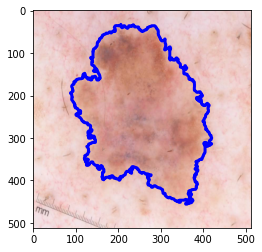

In [8]:
import matplotlib.pyplot as plt
import numpy as np

#https://stackoverflow.com/questions/9295026/how-to-remove-axis-legends-and-white-padding
def plot_sample_example(lesion_img, lesion_mask_img, outputname, size=(IM_HEIGHT, IM_WIDTH), dpi=1):
    plt.imshow(lesion_img.squeeze())
    plt.contour(lesion_mask_img.squeeze(), colors = 'blue', linewidths = 3, levels = [0.5])

plot_sample_example(lesion_img, lesion_mask_img, '/content/sample_data/out.png')

## 3.2 By image path

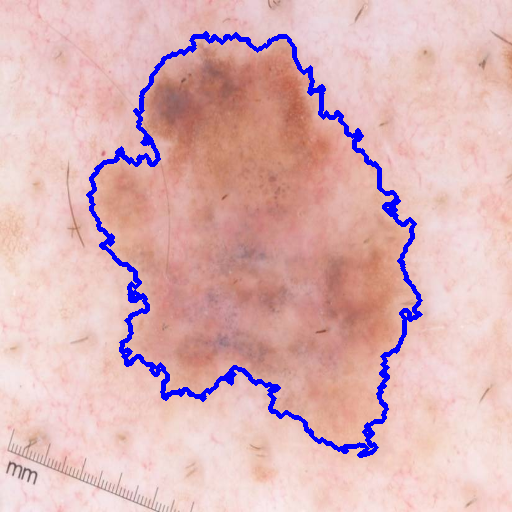

In [12]:
#https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html

lesion_img_cv = cv2.imread("/content/sample_data/ISIC_0000554.jpg")
lesion_img_cv = cv2.resize(lesion_img_cv, (IM_HEIGHT, IM_WIDTH))

lesion_mask_img_cv = cv2.imread("/content/sample_data/ISIC_0000554_segmentation.png")
lesion_mask_img_cv = cv2.resize(lesion_mask_img_cv, (IM_HEIGHT, IM_WIDTH))
lesion_mask_img_cv = cv2.bitwise_not(lesion_mask_img_cv)

imgray = cv2.cvtColor(lesion_mask_img_cv, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(lesion_img_cv, contours, -1, (255,0,0), 3)

cv2_imshow(lesion_img_cv)